# WeatherPy
----

## Findings

__The latitude vs the max temperature was the only comparion that showed a clear correlation__, "the closest to the equator, the hotter the temperature". The other weather parameters seems to response to other factors.

As for the date analyzed, __it would be very unlikely to be in a city with a strong or even fresh breeze__ (wind speed above 39 km/h and 29 km/h respectively, according to Beaufort scale).

__More than a half of the total cities are from the north hemisphere (396 cities), even when the sample construction was randomized.__ This can be explained because there is more land on the north than in the south.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

import os
from dotenv import load_dotenv
load_dotenv()

# Import API key
api_key = os.getenv('weather_api_key')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#city_test = [cities[500], cities[37], cities[244]]
index = 0
units = ["metric", "imperial"]
city_names = []
cloud = []
countries = []
dates = []
humidity = []
lats = []
lngs = []
max_temp = []
wind_spd = []

for city in cities:
    url_build = "https://api.openweathermap.org/data/2.5/weather" + "?q=" + city + "&units=" + units[0] + "&appid=" + api_key
    try:
        city_data = requests.get(url_build).json()
        city_names.append(city_data["name"])
        cloud.append(city_data["clouds"]["all"])
        countries.append(city_data["sys"]["country"])
        dates.append(city_data["dt"])
        humidity.append(city_data["main"]["humidity"])
        lats.append(city_data["coord"]["lat"])
        lngs.append(city_data["coord"]["lon"])
        max_temp.append(city_data["main"]["temp_max"])
        wind_spd.append(city_data["wind"]["speed"])
        print(f"Weather check no. {index}: successful for {city}")
        
    except:
        print(f"Weather check no. {index}: failed for {city}")
    index += 1
print("\n      -------------------\n\
°°° WEATHER CHECK COMPLETE °°°\n\
      -------------------")

Weather check no. 0: successful for mataura
Weather check no. 1: successful for ushuaia
Weather check no. 2: successful for dombarovskiy
Weather check no. 3: successful for talnakh
Weather check no. 4: successful for victoria
Weather check no. 5: successful for tuatapere
Weather check no. 6: successful for hithadhoo
Weather check no. 7: successful for touros
Weather check no. 8: successful for jiaojiang
Weather check no. 9: successful for torbay
Weather check no. 10: successful for ambon
Weather check no. 11: successful for vardo
Weather check no. 12: successful for te anau
Weather check no. 13: successful for alofi
Weather check no. 14: successful for butaritari
Weather check no. 15: successful for blackfoot
Weather check no. 16: failed for taolanaro
Weather check no. 17: successful for pedasi
Weather check no. 18: successful for saskylakh
Weather check no. 19: successful for busselton
Weather check no. 20: successful for dikson
Weather check no. 21: successful for rikitea
Weather che

Weather check no. 176: successful for saint-pierre
Weather check no. 177: successful for flinders
Weather check no. 178: successful for college
Weather check no. 179: successful for kulunda
Weather check no. 180: successful for nova russas
Weather check no. 181: successful for henties bay
Weather check no. 182: successful for cidreira
Weather check no. 183: failed for vaitupu
Weather check no. 184: successful for lannion
Weather check no. 185: successful for bandarbeyla
Weather check no. 186: successful for bengkulu
Weather check no. 187: successful for tacuarembo
Weather check no. 188: successful for kodiak
Weather check no. 189: failed for barentsburg
Weather check no. 190: successful for kieta
Weather check no. 191: successful for nara
Weather check no. 192: successful for portland
Weather check no. 193: successful for sao filipe
Weather check no. 194: failed for mentok
Weather check no. 195: successful for neiafu
Weather check no. 196: successful for airai
Weather check no. 197: su

Weather check no. 352: successful for san antonio
Weather check no. 353: successful for ahipara
Weather check no. 354: successful for altusried
Weather check no. 355: successful for baijiantan
Weather check no. 356: successful for bathsheba
Weather check no. 357: successful for olenegorsk
Weather check no. 358: successful for bada
Weather check no. 359: successful for kavaratti
Weather check no. 360: successful for santa cruz
Weather check no. 361: successful for oconomowoc
Weather check no. 362: successful for lensk
Weather check no. 363: successful for taoudenni
Weather check no. 364: successful for hofn
Weather check no. 365: successful for tautira
Weather check no. 366: successful for atagay
Weather check no. 367: successful for lebu
Weather check no. 368: successful for port-gentil
Weather check no. 369: successful for norman wells
Weather check no. 370: successful for taunggyi
Weather check no. 371: successful for puerto escondido
Weather check no. 372: successful for palembang
W

Weather check no. 526: successful for razole
Weather check no. 527: successful for severnyy
Weather check no. 528: successful for san juan de arama
Weather check no. 529: successful for penzance
Weather check no. 530: successful for senador pompeu
Weather check no. 531: successful for matara
Weather check no. 532: successful for emba
Weather check no. 533: successful for shingu
Weather check no. 534: successful for sun valley
Weather check no. 535: failed for tabukiniberu
Weather check no. 536: successful for angoche
Weather check no. 537: successful for windsor
Weather check no. 538: successful for balakhninskiy
Weather check no. 539: successful for bundaberg
Weather check no. 540: successful for quatre cocos
Weather check no. 541: successful for half moon bay
Weather check no. 542: successful for carhuamayo
Weather check no. 543: successful for aljezur
Weather check no. 544: successful for shenjiamen
Weather check no. 545: successful for piacabucu
Weather check no. 546: successful fo

In [4]:
#Verify the retrieved data was complete and get final number of cities to work with
print(len(city_names))
print(len(cloud))
print(len(countries))
print(len(dates))
print(len(humidity))
print(len(lats))
print(len(lngs))
print(len(max_temp))
print(len(wind_spd))

575
575
575
575
575
575
575
575
575


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Convert wind speed from m/s to km/h
wind_kmh = [round((wind * 3.6), 1) for wind in wind_spd]


In [6]:
cities_current_weather = pd.DataFrame({
    "City" : city_names,
    "Cloudiness (%)" : cloud,
    "Country" : countries,
    "Date" : dates,
    "Humidity (%)" : humidity,
    "Latitude" : lats,
    "Longitude" : lngs,
    "Max Temp (°C)" : max_temp,
    "Wind Speed (km-h)" : wind_kmh
})

cities_current_weather.to_csv("cities_weather_check.csv", index = False)

In [2]:
cities_weather = pd.read_csv("cities_weather_check.csv")
cities_weather.head()

NameError: name 'pd' is not defined

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

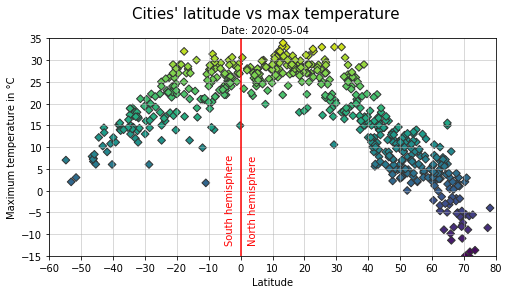

In [8]:
date_data = datetime.datetime.fromtimestamp(int(cities_weather.iloc[0,3])).strftime("%Y-%m-%d")

plt.figure(figsize=(8,4))
plt.scatter(cities_weather["Latitude"], cities_weather["Max Temp (°C)"],
           marker = "D", edgecolors = "#333333",
           c=cities_weather["Max Temp (°C)"],
           s = 30)

plt.grid(alpha = .6)
plt.axvline(x=0, ymin=-15, ymax=35, color = "r")

plt.xticks(np.arange(-60, 100, step=10))
plt.yticks(np.arange(-15, 40, step=5))
plt.xlim(-60,80)
plt.ylim(-15,35)

plt.figtext(.5,.95,"Cities' latitude vs max temperature", fontsize = 15, ha="center")
plt.figtext(.5,.90,f"Date: {date_data}", fontsize = 10, ha="center")
plt.ylabel("Maximum temperature in °C")
plt.xlabel("Latitude")
plt.figtext(.47,.17, "North hemisphere", color = "r", rotation = 90)
plt.figtext(.43,.17, "South hemisphere", color = "r", rotation = 90)
plt.savefig(f"scatter_plots/Cities' latitude vs max temperature.png", bbox_inches = "tight", dpi = 120)
plt.show()

According to the plot, there seems to be a relation between both variables. __The closer the latitude to the Equator (lat = 0),
the hotter it gets__. Furthermore, southern cities barely reach a latitude of -40°, meaning that by choosing a city from that half, it is unlikely to get a temperature lower than 10°C; in comparison to the northern cities, where you can pick places with temperatures below 0°C.

#### Latitude vs. Humidity Plot

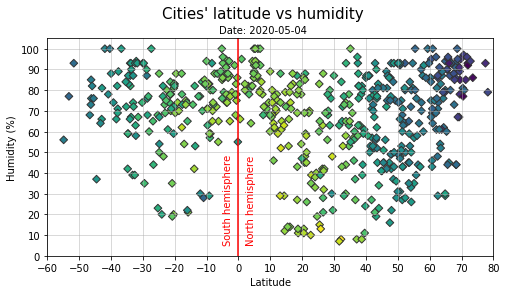

In [9]:
date_data = datetime.datetime.fromtimestamp(int(cities_weather.iloc[0,3])).strftime("%Y-%m-%d")

plt.figure(figsize=(8,4))
plt.scatter(cities_weather["Latitude"], cities_weather["Humidity (%)"],
           marker = "D", edgecolors = "#333333",
           c=cities_weather["Max Temp (°C)"],
           s = 30)

plt.grid(alpha = .6)
plt.axvline(x=0, ymin=0, ymax=100, color = "r")

plt.xticks(np.arange(-60, 90, step=10))
plt.yticks(np.arange(0, 120, step=10))
plt.xlim(-60,80)
plt.ylim(0,105)

plt.figtext(.5,.95,"Cities' latitude vs humidity", fontsize = 15, ha="center")
plt.figtext(.5,.90,f"Date: {date_data}", fontsize = 10, ha="center")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.figtext(.47,.17, "North hemisphere", color = "r", rotation = 90)
plt.figtext(.43,.17, "South hemisphere", color = "r", rotation = 90)
plt.savefig(f"scatter_plots/Cities' latitude vs humidity.png", bbox_inches = "tight", dpi = 120)
plt.show()

Overal, we can appreciate that __most of the cities have an humidity above 60%__. However, northern cities can cover all the humidity percentages (from 10% to 100%). In contrast with the southern cities, where very few cities have a humidity below 60%. 

#### Latitude vs. Cloudiness Plot

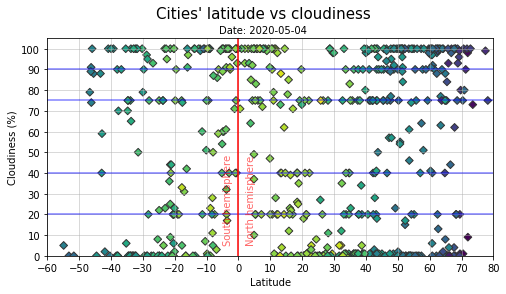

In [10]:
date_data = datetime.datetime.fromtimestamp(int(cities_weather.iloc[0,3])).strftime("%Y-%m-%d")

plt.figure(figsize=(8,4))
plt.scatter(cities_weather["Latitude"], cities_weather["Cloudiness (%)"],
           marker = "D", edgecolors = "#333333",
           c=cities_weather["Max Temp (°C)"],
           s = 30)

plt.grid(alpha = .6)
plt.axvline(x=0, ymin=0, ymax=100, color = "r")
plt.hlines(90,-60,80,alpha=.5, color = "b")
plt.hlines(75,-60,80,alpha=.5, color = "b")
plt.hlines(40,-60,80,alpha=.5, color = "b")
plt.hlines(20,-60,80,alpha=.5, color = "b")

plt.xticks(np.arange(-60, 90, step=10))
plt.yticks(np.arange(0, 120, step=10))
plt.xlim(-60,80)
plt.ylim(0,105)

plt.figtext(.5,.95,"Cities' latitude vs cloudiness", fontsize = 15, ha="center")
plt.figtext(.5,.90,f"Date: {date_data}", fontsize = 10, ha="center")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.figtext(.47,.17, "North hemisphere", color = "r", rotation = 90, alpha = .6)
plt.figtext(.43,.17, "South hemisphere", color = "r", rotation = 90, alpha = .6)
plt.savefig(f"scatter_plots/Cities' latitude vs cloudiness.png", bbox_inches = "tight", dpi = 120)
plt.show()

We can appreciate that __a great amount of cities landed on the extremes of cloudiness (either 0% or 100%)__ and the rest are distributed in the interval. We could say the next most common cloudiness values after the extremes are 90%, 75%, 40% and 20%.

#### Latitude vs. Wind Speed Plot

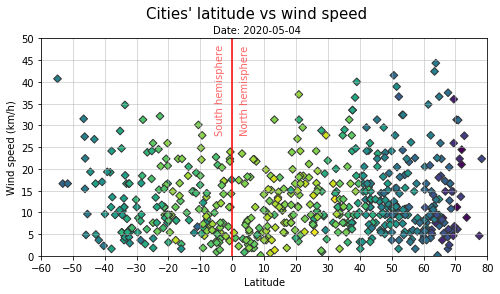

In [23]:
date_data = datetime.datetime.fromtimestamp(int(cities_weather.iloc[0,3])).strftime("%Y-%m-%d")

plt.figure(figsize=(8,4))
plt.scatter(cities_weather["Latitude"], cities_weather["Wind Speed (km-h)"],
           marker = "D", edgecolors = "#333333",
           c=cities_weather["Max Temp (°C)"],
           s = 30)

plt.grid(alpha = .6)
plt.axvline(x=0, ymin=0, ymax=100, color = "r")

plt.xticks(np.arange(-60, 90, step=10))
plt.yticks(np.arange(0, 55, step=5))
plt.xlim(-60,80)
plt.ylim(0,50)

plt.figtext(.5,.95,"Cities' latitude vs wind speed", fontsize = 15, ha="center")
plt.figtext(.5,.90,f"Date: {date_data}", fontsize = 10, ha="center")
plt.ylabel("Wind speed (km/h)")
plt.xlabel("Latitude")
plt.figtext(.47,.55, "North hemisphere", color = "r", rotation = 90, alpha = .6)
plt.figtext(.427,.55, "South hemisphere", color = "r", rotation = 90, alpha = .6)
plt.savefig(f"scatter_plots/Cities' latitude vs wind speed.png", bbox_inches = "tight", dpi = 120)
plt.show()

There seems to be no correlation between the latitude and wind speed since __all latitudes have either a light or moderate breeze (from 0 to 25 km/h)__.  

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities = cities_weather.loc[cities_weather["Latitude"] > 0]
southern_cities = cities_weather.loc[cities_weather["Latitude"] < 0]

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def weather_plot(dataframe_name, x_par, y_par, north = True):
    
    date_data = datetime.datetime.fromtimestamp(int(dataframe_name.iloc[0,3])).strftime("%Y-%m-%d")
    if north:
        color_marker = "#e00047"
        hemisphere = "Northen"
        regress_color = "#14961d"
    else: 
        color_marker = "#0390fc"
        hemisphere = "Southern"
        regress_color = "#f29100"
    
    plt.figure(figsize=(8,4))
    plt.scatter(dataframe_name[x_par], dataframe_name[y_par],
           marker = "D", edgecolors = "#333333",
           c= color_marker,
           s = 30)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dataframe_name[x_par], dataframe_name[y_par])
    regress_values = dataframe_name[x_par] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.grid(alpha = .6)
    plt.xticks(np.arange(round(min(dataframe_name[x_par]),0), round(max(dataframe_name[x_par]),0) + 10, step=10))
    plt.yticks(np.arange(round(min(dataframe_name[y_par]),0), round(max(dataframe_name[y_par]),0) + 10, step = 5))
    plt.xlim(round(min(dataframe_name[x_par]),0),round(max(dataframe_name[x_par]),0)+5)
    plt.ylim(round(min(dataframe_name[y_par]),0) - 5, round(max(dataframe_name[y_par]),0)+5)
    
    plt.figtext(.5,.95, f"{hemisphere} Cities' {x_par} vs {y_par}", fontsize = 15, ha="center")
    plt.figtext(.5,.90,f"Date: {date_data}", fontsize = 10, ha="center")
    plt.ylabel(y_par)
    plt.xlabel(x_par)
    
    plt.plot(dataframe_name[x_par], regress_values, regress_color, linewidth = 3)
    plt.figtext(.93,.5, line_eq, color = regress_color, fontsize = 12, backgroundcolor = "#383838")
    
    plt.savefig(f"scatter_plots/{hemisphere} Cities' {x_par} vs {y_par}.png", bbox_inches = "tight", dpi = 120)
    
    print(f"Person's r value is: {round(rvalue, 3)}")

    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

As we can appreciate, the northern cities have a negative correlation between its latitude and max temperature. The higher the first factor, the lower the temperature. The opposite occurs with the southern cities. However, we know the change of temperature due to the change of latitude is slightly larger in the northern cities due to its "r" and "slope" values (r = -0.894 and slope = -0.52).

Person's r value is: -0.894


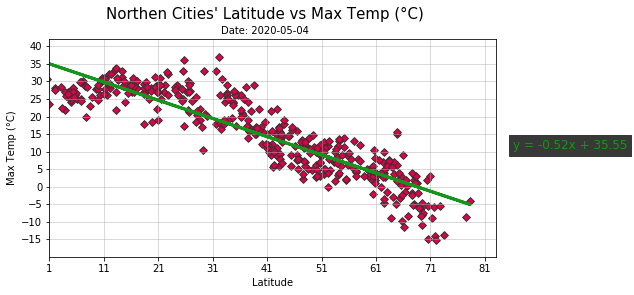

In [15]:
weather_plot(northern_cities, "Latitude", "Max Temp (°C)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Person's r value is: 0.751


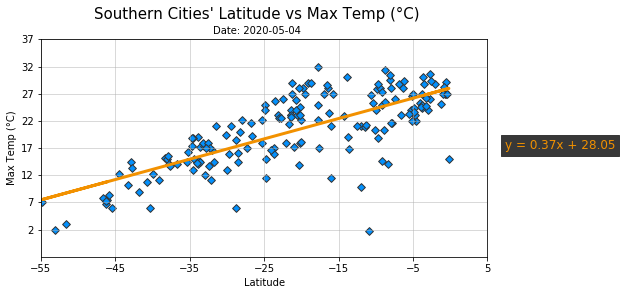

In [16]:
weather_plot(southern_cities, "Latitude", "Max Temp (°C)", False)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Due to the r values of both hemispheres (r < 0.2) we can conclude there is a very weak correlation between the latitude and percentage of humidity. Actually, from the data points dispersion of both plots, we can ensure to encounter similar percentage of humidity at any latitude.

Person's r value is: 0.106


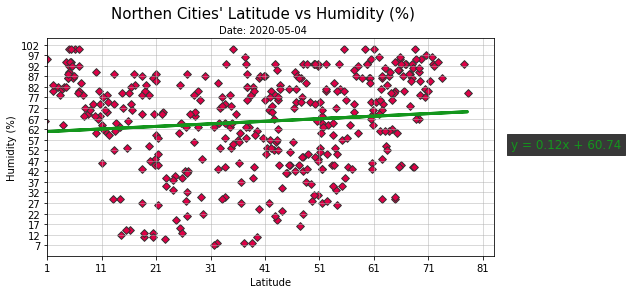

In [17]:
weather_plot(northern_cities, "Latitude", "Humidity (%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Person's r value is: 0.048


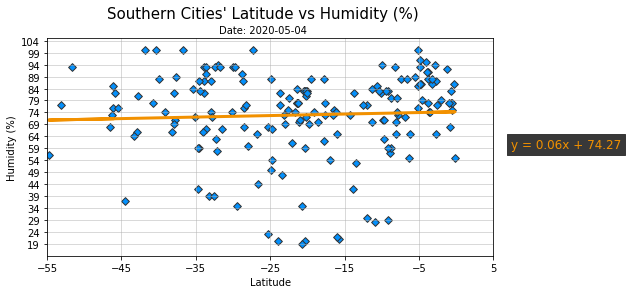

In [18]:
weather_plot(southern_cities, "Latitude", "Humidity (%)", False)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
As mentioned in the previous plot about cloudiness, the most common cloudiness percentages from the cities of both hemispheres are the extreme values (100% and 0% of cloudiness) along all the latitudes. Due to this, the correlation between both parameters is practically null. 

Person's r value is: 0.097


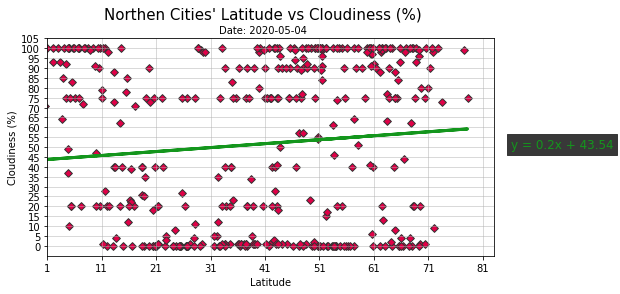

In [19]:
weather_plot(northern_cities, "Latitude", "Cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Person's r value is: 0.209


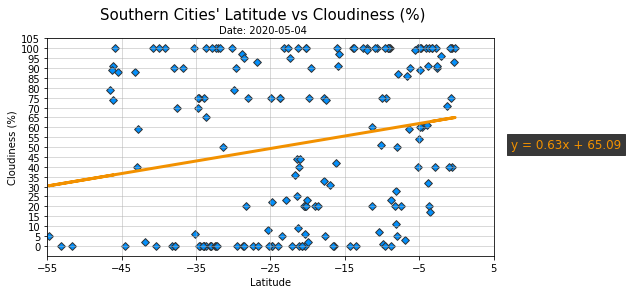

In [20]:
weather_plot(southern_cities, "Latitude", "Cloudiness (%)", False)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Similar to other comparisons, there seems to be a null correlation between the latitude and wind speed, this for both hemispheres. However, you may find a small bunch of northern cities with higher wind speeds than in the sourthern.

Person's r value is: 0.168


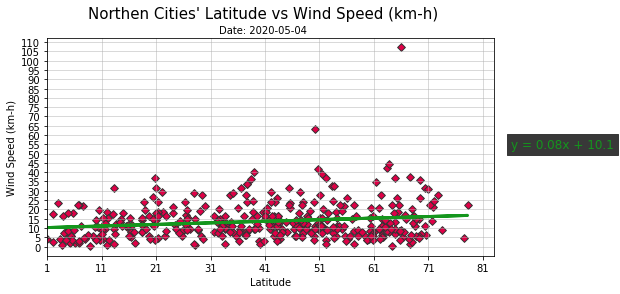

In [21]:
weather_plot(northern_cities, "Latitude", "Wind Speed (km-h)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Person's r value is: -0.175


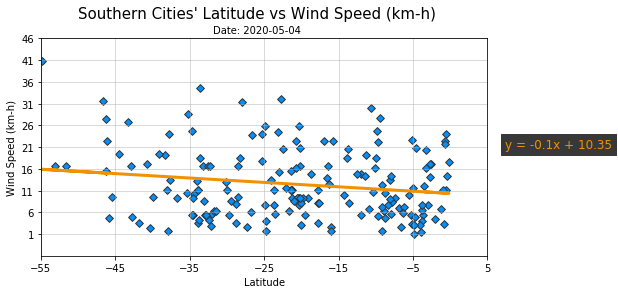

In [22]:
weather_plot(southern_cities, "Latitude", "Wind Speed (km-h)", False)